#### General Import

In [3]:
import numpy as np
from scipy import stats
from r_pca import R_pca
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.hbos import HBOS
from pyod.models.cblof import CBLOF
from pyod.utils.data import generate_data 
from pyod.utils.example import visualize
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def anomaly_detection(clf_name, clf):
    clf.fit(X_train)
    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores
    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
    return y_train_pred, y_test_pred

In [5]:
contamination = 0.1  # Percentage of outliers
n_train = 200        # Number of training points
n_test = 100         # Number of testing points
# Generate Data 
X_train, y_train, X_test, y_test = generate_data(n_train=n_train, n_test=n_test, contamination=contamination)

In [6]:
clf_name = 'KNN'
clf = KNN()
y_train_pred,y_test_pred = anomaly_detection(clf_name, clf)

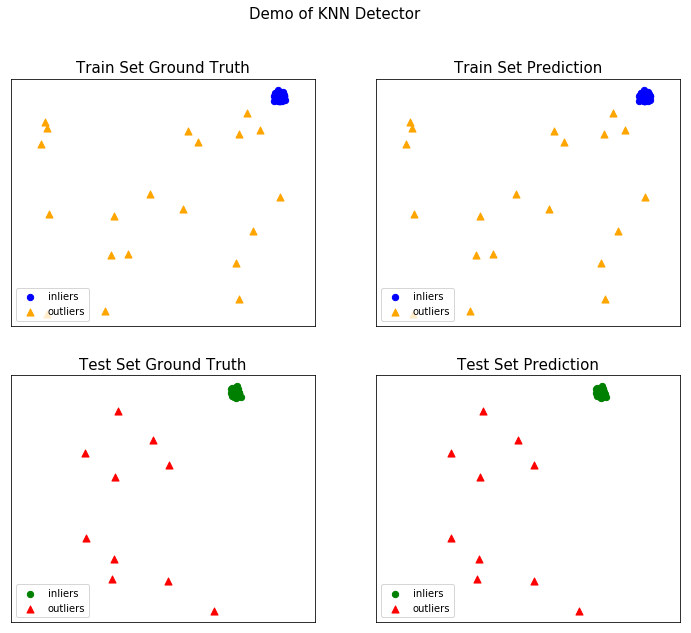

In [7]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,y_test_pred, show_figure=True, save_figure=False)

In [8]:
clf_name = 'HBOS'
clf = HBOS()
y_train_pred,y_test_pred = anomaly_detection(clf_name, clf)

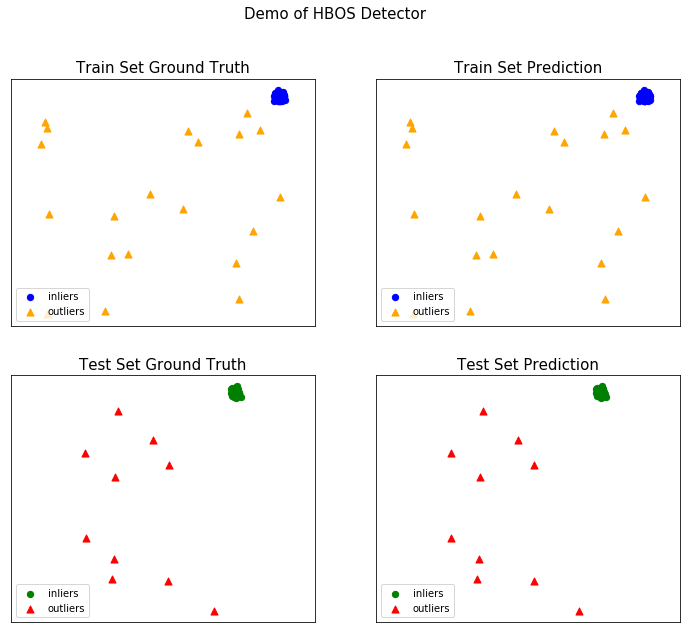

In [9]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

In [10]:
clf_name = 'CBLOF'
clf = CBLOF()
y_train_pred,y_test_pred = anomaly_detection(clf_name, clf)

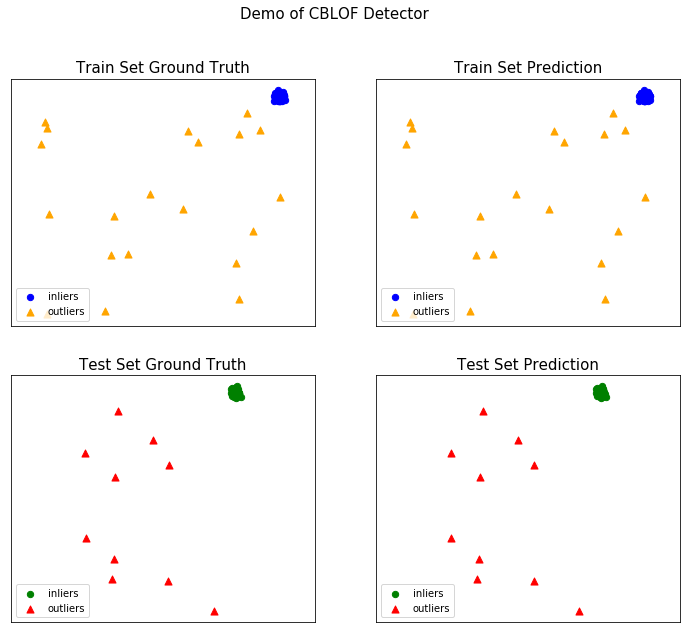

In [11]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

In [12]:
clf_name = 'PCA'
clf = PCA()
y_train_pred,y_test_pred = anomaly_detection(clf_name, clf)

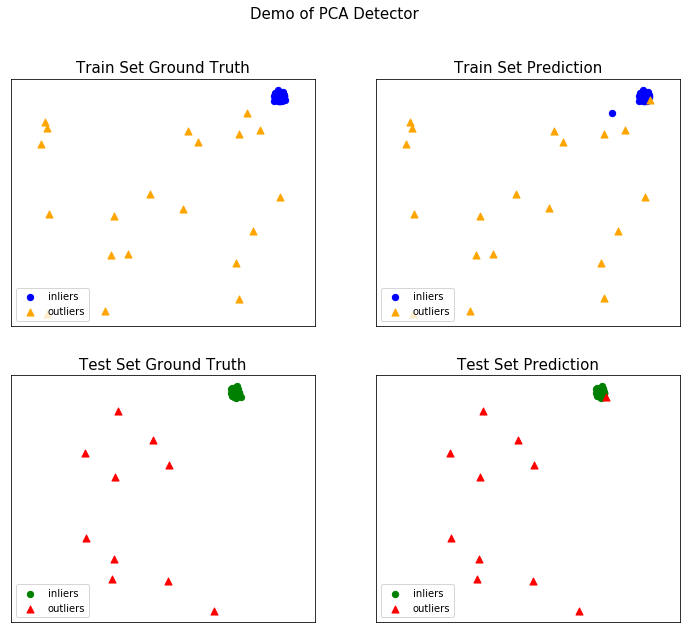

In [13]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,y_test_pred, show_figure=True, save_figure=False)

In [14]:
clf_name = 'RPCA'
clf = R_pca(X_train)
y_train_pred, y_train_scores = clf.fit(max_iter=10000, iter_print=100)

iteration: 1, error: 0.820385051368038
iteration: 100, error: 0.0015248296684773131
iteration: 195, error: 7.7159073202889e-06


In [15]:
clf = R_pca(X_test)
y_test_pred, y_test_scores = clf.fit(max_iter=10000, iter_print=100)

iteration: 1, error: 1.1661255473623222
iteration: 100, error: 0.0006064713098245202
iteration: 200, error: 9.700814121630081e-05
iteration: 300, error: 9.745041158309149e-05
iteration: 348, error: 4.313874370177026e-06


In [16]:
res1 = np.array([1 if item[0] == True or item[1] == True else 0 for item in np.abs(stats.zscore(y_train_scores)) > 1])
res2 = np.array([1 if item[0] == True or item[1] == True else 0 for item in np.abs(stats.zscore(y_test_scores)) > 1])

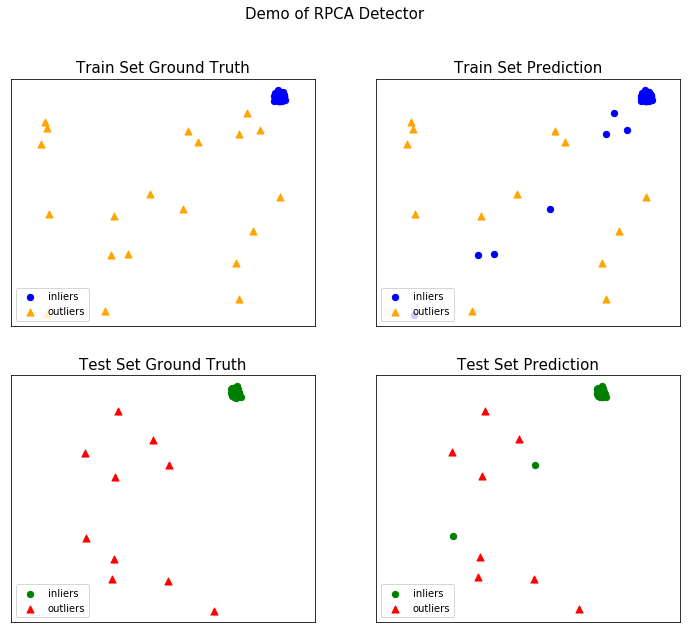

In [17]:
visualize(clf_name, X_train, y_train, X_test, y_test, res1, res2, show_figure=True, save_figure=False)